# Task 2.1: Clustering (K-Means on Iris Dataset)

In [33]:
# This script applies K-Means clustering on the preprocessed Iris dataset,
# compares predicted clusters with actual species labels using ARI,
# and visualizes the results.

# --- Step 1: Import required libraries ---
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# --- Step 2: Load the preprocessed dataset ---
# Make sure you saved the scaled iris dataset from Task 1 as "iris_preprocessed.csv"
df = pd.read_csv("iris_preprocessed.csv")

# --- Step 3: Separate features (X) and true labels (y) ---
X = df.iloc[:, 0:4]             # First 4 columns are scaled features
y = df.iloc[:, 4:]              # Last 3 columns are one-hot labels
y_true = y.idxmax(axis=1)       # Convert one-hot back to label names

# --- Step 4: Apply K-Means clustering with k=3 ---
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X)



c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Evaluate Clustering Performance
We use **Adjusted Rand Index (ARI)**, which measures similarity between predicted clusters and actual classes.


In [34]:
# --- Step 5: Compare predicted clusters with actual classes ---
ari_score = adjusted_rand_score(y_true, y_pred)
print("\n--- Clustering Results ---")
print("Adjusted Rand Index (ARI):", round(ari_score, 3))


--- Clustering Results ---
Adjusted Rand Index (ARI): 0.716


# Compare Actual vs Predicted Clusters
We create a small table showing both.


## 2.2 Experiment with Different k Values and Elbow Curve
We will:
1. Try **k=2** and **k=4** for K-Means to compare with the original k=3.
2. Plot an **elbow curve** to find the optimal number of clusters.


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

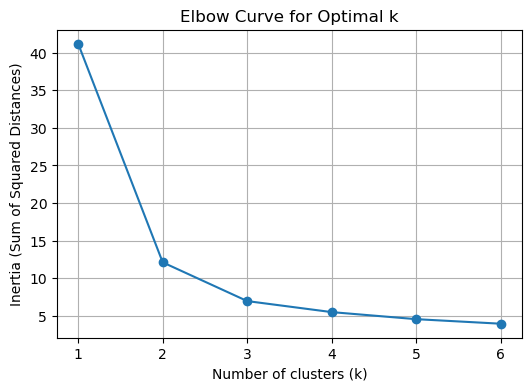

In [35]:
import matplotlib.pyplot as plt  # For plotting

# Store inertia values (sum of squared distances) for different k
inertia_values = []

# Range of k to test
k_values = range(1, 7)  # 1 to 6 clusters

# Fit K-Means for each k and store inertia
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X)   # where X = df.iloc[:, 0:4]

    inertia_values.append(model.inertia_)

# Plot elbow curve
plt.figure(figsize=(6, 4))
plt.plot(k_values, inertia_values, marker='o')
plt.title("Elbow Curve for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.xticks(k_values)
plt.grid(True)
plt.savefig("elbow_curve.png")  # Save for submission
plt.show()


Interpretation of the Elbow Curve

The elbow curve above shows the relationship between the number of clusters (k) and the inertia (sum of squared distances within clusters). As expected, the inertia decreases as the number of clusters increases, since more clusters lead to tighter groupings. However, after a certain point, the improvement becomes marginal, which indicates the optimal number of clusters.

From the graph, we observe a steep drop in inertia from k = 1 to k = 2, and another noticeable drop from k = 2 to k = 3. Beyond k = 3, the curve begins to flatten, with only minor reductions in inertia for higher values of k. This "elbow" effect is most prominent at k = 3, which suggests that three clusters provide the best balance between compactness and interpretability.

This finding aligns well with the known structure of the Iris dataset, which naturally contains three species (Setosa, Versicolor, and Virginica). Thus, the elbow curve confirms that k = 3 is the most suitable choice for clustering this dataset.

## 2.3 Visualize Clusters
We will:
1. Use the **K-Means model with k=3** from Task 3.1.
2. Create a scatter plot of **Petal Length vs. Petal Width**.
3. Color points by their **cluster labels**.
4. Mark cluster centers on the plot.


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


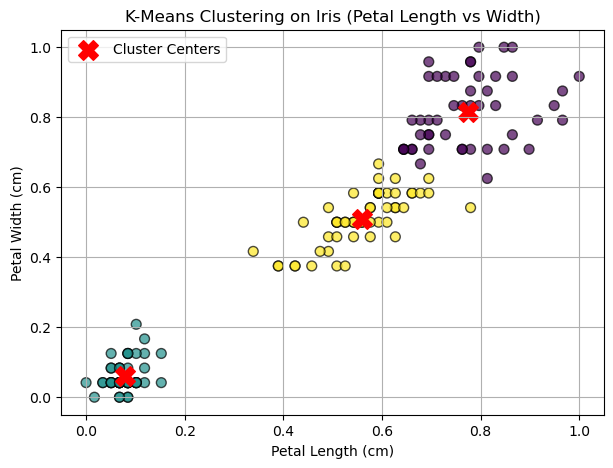

In [36]:
# Task 2.3: Visualize clusters (petal length vs petal width) ---

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select only the two features for visualization
X_viz = df[["petal length (cm)", "petal width (cm)"]]

# Apply KMeans with k=3 (optimal choice from elbow curve)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_viz)

# Plot the clusters
plt.figure(figsize=(7, 5))

# Scatter plot: points colored by cluster assignment
plt.scatter(X_viz.iloc[:, 0], X_viz.iloc[:, 1], 
            c=clusters, cmap="viridis", s=50, alpha=0.7, edgecolor="k")

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], 
            c="red", marker="X", s=200, label="Cluster Centers")

# Titles and labels
plt.title("K-Means Clustering on Iris (Petal Length vs Width)")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend()
plt.grid(True)
plt.savefig("iris_clusters.png")  # Save for submission
plt.show()


### Interpretation of Cluster Visualization  

The scatter plot shows the results of **K-Means clustering (k=3)** applied to the Iris dataset using **petal length** and **petal width** as features. Each point represents a flower, with colors indicating the cluster assigned by the algorithm, while the red "X" markers represent the **cluster centers**.  

From the plot, we observe:  
- The **leftmost cluster (teal)** is very compact and corresponds almost entirely to **Iris Setosa**, which is well separated from the others.  
- The **middle cluster (yellow)** and the **right cluster (purple)** represent **Iris Versicolor** and **Iris Virginica**. These two groups overlap slightly, which is expected, since Versicolor and Virginica share similar petal measurements.  
- The cluster centers are positioned close to the densest regions of their groups, confirming that K-Means has successfully identified meaningful separations in the dataset.  

Overall, this visualization confirms that **three clusters (k=3)** provide a natural grouping of the iris flowers, aligning closely with the three known species.  


## 2.4 Cluster Analysis  

The K-Means clustering with *k=3* produced meaningful groups on the Iris dataset, achieving an **Adjusted Rand Index (ARI) of 0.716**. This value indicates a substantial but imperfect alignment between predicted clusters and true species labels. The clustering works exceptionally well for **Setosa**, which is small-petaled and well-separated from the other species, leading to nearly zero misclassifications. However, **Versicolor and Virginica show overlaps** in petal length and width, which causes K-Means to confuse them. These **misclassifications** arise because their feature ranges are not linearly separable, and K-Means assumes spherical clusters, which may not fully capture the natural boundaries in the data.  

In terms of **real-world applications**, clustering is widely used in **customer segmentation**, where businesses group customers by purchasing habits, demographics, or browsing behavior to tailor marketing strategies. Similarly, in **healthcare**, clustering can identify patient subgroups with similar symptoms, aiding in personalized treatment.  

If **synthetic or noisy data** were used, clustering performance would likely decrease, as artificial patterns could distort natural boundaries between groups. This highlights the importance of high-quality, representative data for effective unsupervised learning.  
